# K Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [4]:
# importing data into python

# set current working directory
current_working_directory = 'C:\\Users\\peace\\Documents\\GitHub\\CreditCardChurnAnalysis'
os.chdir(current_working_directory)

In [5]:
# importing csv

credit = pd.read_csv('BankChurners.csv')
credit

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Data cleaning and transformation

A check on the data types of each column reveals that they are all in proper order. Hence, no transformation of the data type is needed. However, two columns were provided that is not needed for the purposes of this analysis. Namely:

(1)'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
(2)'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'

We drop these two columns.

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
credit.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [8]:
# drop last two columns of the data frame
credit.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace = True)

# Stardardize all numerical variables
credit['tr_Customer_Age'] = (credit['Customer_Age']-np.mean(credit['Customer_Age']))/np.std(credit['Customer_Age'])
credit['tr_Total_Relationship_Count'] = (credit['Total_Relationship_Count']-np.mean(credit['Total_Relationship_Count']))/np.std(credit['Total_Relationship_Count'])
credit['tr_Months_Inactive_12_mon'] = (credit['Months_Inactive_12_mon']-np.mean(credit['Months_Inactive_12_mon']))/np.std(credit['Months_Inactive_12_mon'])
credit['tr_Contacts_Count_12_mon'] = (credit['Contacts_Count_12_mon']-np.mean(credit['Contacts_Count_12_mon']))/np.std(credit['Contacts_Count_12_mon'])
credit['tr_Credit_Limit'] = (credit['Credit_Limit']-np.mean(credit['Credit_Limit']))/np.std(credit['Credit_Limit'])
credit['tr_Total_Revolving_Bal'] = (credit['Total_Revolving_Bal']-np.mean(credit['Total_Revolving_Bal']))/np.std(credit['Total_Revolving_Bal'])
credit['tr_Avg_Open_To_Buy'] = (credit['Avg_Open_To_Buy']-np.mean(credit['Avg_Open_To_Buy']))/np.std(credit['Avg_Open_To_Buy'])
credit['tr_Total_Amt_Chng_Q4_Q1'] = (credit['Total_Amt_Chng_Q4_Q1']-np.mean(credit['Total_Amt_Chng_Q4_Q1']))/np.std(credit['Total_Amt_Chng_Q4_Q1'])
credit['tr_Total_Trans_Amt'] = (credit['Total_Trans_Amt']-np.mean(credit['Total_Trans_Amt']))/np.std(credit['Total_Trans_Amt'])
credit['tr_Total_Trans_Ct'] = (credit['Total_Trans_Ct']-np.mean(credit['Total_Trans_Ct']))/np.std(credit['Total_Trans_Ct'])
credit['tr_Total_Ct_Chng_Q4_Q1'] = (credit['Total_Ct_Chng_Q4_Q1']-np.mean(credit['Total_Ct_Chng_Q4_Q1']))/np.std(credit['Total_Ct_Chng_Q4_Q1'])
credit['tr_Avg_Utilization_Ratio'] = (credit['Avg_Utilization_Ratio']-np.mean(credit['Avg_Utilization_Ratio']))/np.std(credit['Avg_Utilization_Ratio'])

# Change Attrition Flag values from string to 1 and 0
credit['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)

# Clustering

In order to draw insights on the types of customers that are more likely to churn or not churn, we can perform clustering to partition data into groups, such that meaningful clusters based on customer demographics can be derived. Several clustering algorithms such as (1) Partitional Clustering (2) Hierarchical clustering (3) Density-based clustering

Partitional based clustering, namely k-means clustering was selected for the following reasons:
- Generally, k-means is superior to hierarchical methods when working with relatively large datasets because it is less computationally demanding

- For k-means clustering, the optimal number of clusters have to be specified in advance. Generally, demographic categorical variables can be segmented into 3 groups. For instance
    - Married, Single, Divorced
    - Children and young adolescents (under 15 years old), the working-age population (15-64 years) and the elderly population (65 years and older)
    - No education, High school education, Graduate education

- While the business assumption is that customers can be optimally segmented into 3 groups, we will use 'elbow method' to evaluate the appropriate number of clusters.

In [1]:
import sklearn.cluster as skc
import sklearn.preprocessing as skp
import sklearn.feature_selection as skfs
import sklearn.decomposition as skd

In [9]:
kmeans = skc.KMeans(n_clusters=4)

y = kmeans.fit_predict(credit[[
 'tr_Customer_Age',
 'tr_Total_Relationship_Count',
 'tr_Months_Inactive_12_mon',
 'tr_Contacts_Count_12_mon',
 'tr_Credit_Limit',
 'tr_Total_Revolving_Bal',
 'tr_Avg_Open_To_Buy',
 'tr_Total_Amt_Chng_Q4_Q1',
 'tr_Total_Trans_Amt',
 'tr_Total_Trans_Ct',
 'tr_Total_Ct_Chng_Q4_Q1',
 'tr_Avg_Utilization_Ratio']])

credit['Cluster'] = y

credit

C:\Users\xJrin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,tr_Contacts_Count_12_mon,tr_Credit_Limit,tr_Total_Revolving_Bal,tr_Avg_Open_To_Buy,tr_Total_Amt_Chng_Q4_Q1,tr_Total_Trans_Amt,tr_Total_Trans_Ct,tr_Total_Ct_Chng_Q4_Q1,tr_Avg_Utilization_Ratio,Cluster
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,1
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,1
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,1
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,1
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0.492404,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714,3
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0.492404,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458,1
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,1.396424,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155,0
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155,0


In [10]:
# 4 clusters are grouped.
customer_cluster = {'Total': credit["Cluster"].value_counts()}
churn = pd.DataFrame(customer_cluster)
churn

,Total
1,4326
0,3386
2,1386
3,1029


# Validate optimal clusters - Elbow Method

To find out what is the optimal number of clusters, we apply the elbow method. The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 9) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow” (the point of inflection on the curve) is the best value of k.

In [11]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = skc.KMeans(n_clusters=k)
    kmeanModel.fit(credit[[
 'tr_Customer_Age',
 'tr_Total_Relationship_Count',
 'tr_Months_Inactive_12_mon',
 'tr_Contacts_Count_12_mon',
 'tr_Credit_Limit',
 'tr_Total_Revolving_Bal',
 'tr_Avg_Open_To_Buy',
 'tr_Total_Amt_Chng_Q4_Q1',
 'tr_Total_Trans_Amt',
 'tr_Total_Trans_Ct',
 'tr_Total_Ct_Chng_Q4_Q1',
 'tr_Avg_Utilization_Ratio']])
    distortions.append(kmeanModel.inertia_)

C:\Users\xJrin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xJrin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xJrin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xJrin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xJrin\anaconda3\lib\site-packages\sklearn\clust

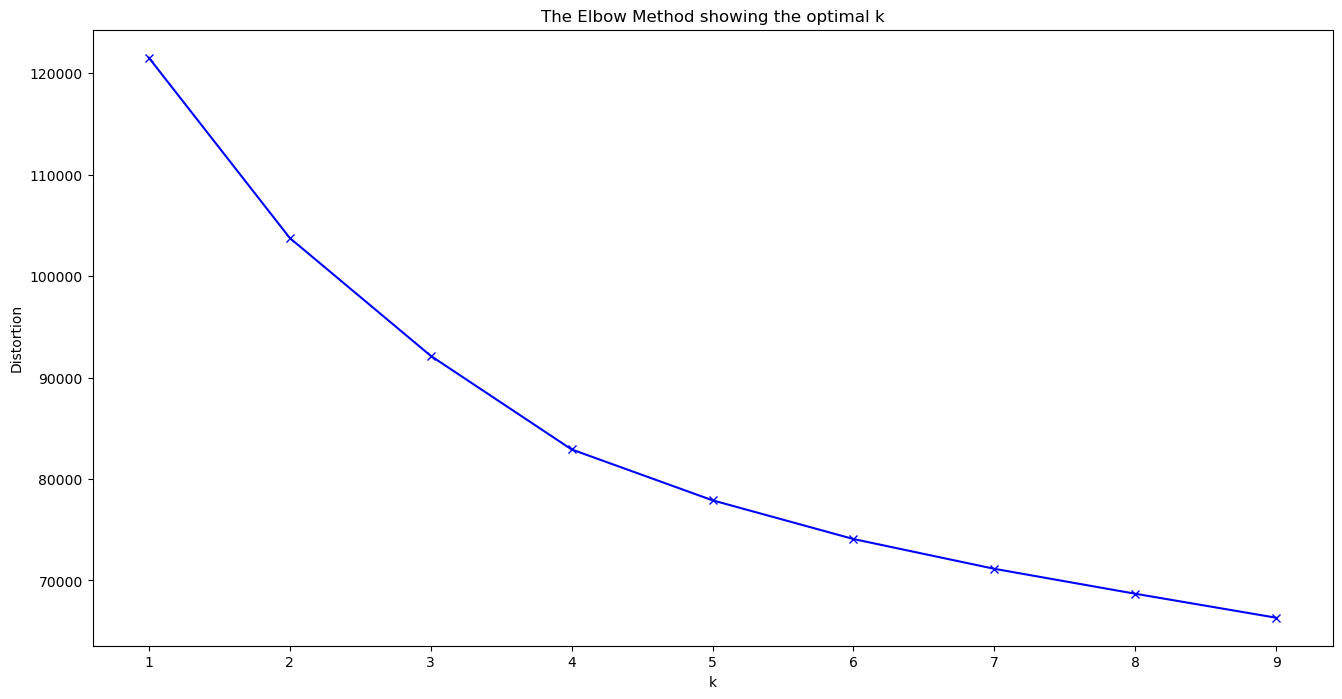

In [12]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### We see that the "elbow" is the number 4 which is the optimal for this case. 

In [14]:
array = credit.values
X = array[:, 22:34]
Y = array[:,1]

# Feature extraction
test = skfs.SelectKBest(score_func=skfs.f_classif, k=5)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=2)
print(fit.scores_)
features = fit.transform(X)

# summarize selected features
#print(features[0:5,:])

feature_importance = pd.DataFrame(fit.scores_, index=['tr_Customer_Age',
 'tr_Total_Relationship_Count',
 'tr_Months_Inactive_12_mon',
 'tr_Contacts_Count_12_mon',
 'tr_Credit_Limit',
 'tr_Total_Revolving_Bal',
 'tr_Avg_Open_To_Buy',
 'tr_Total_Amt_Chng_Q4_Q1',
 'tr_Total_Trans_Amt',
 'tr_Total_Trans_Ct',
 'tr_Total_Ct_Chng_Q4_Q1',
 'tr_Avg_Utilization_Ratio'])

print(feature_importance.sort_values(by=0, ascending=False))

[2.33e+02 2.41e+02 4.42e+02 5.77e+00 7.53e+02 8.23e-04 1.77e+02 2.96e+02
 1.62e+03 9.30e+02 3.33e+02 5.41e+02]
                                       0
tr_Total_Trans_Amt           1620.121692
tr_Total_Trans_Ct             930.078416
tr_Credit_Limit               752.702408
tr_Avg_Utilization_Ratio      540.574324
tr_Months_Inactive_12_mon     441.868050
tr_Total_Ct_Chng_Q4_Q1        332.876795
tr_Total_Amt_Chng_Q4_Q1       296.227714
tr_Total_Relationship_Count   240.910376
tr_Customer_Age               233.072886
tr_Avg_Open_To_Buy            176.961638
tr_Contacts_Count_12_mon        5.773729
tr_Total_Revolving_Bal          0.000823


# Feature importance
We see that tr_Contacts_Count_12mon and tr_Total_Revolving_Bal has low importance in the clustering. We remove them to improve the clustering accuracy

In [15]:
kmeans = skc.KMeans(n_clusters=4)

y = kmeans.fit_predict(credit[[
 'tr_Customer_Age',
 'tr_Total_Relationship_Count',
 'tr_Months_Inactive_12_mon',
 'tr_Credit_Limit',
 'tr_Avg_Open_To_Buy',
 'tr_Total_Amt_Chng_Q4_Q1',
 'tr_Total_Trans_Amt',
 'tr_Total_Trans_Ct',
 'tr_Total_Ct_Chng_Q4_Q1',
 'tr_Avg_Utilization_Ratio']])

credit['Cluster'] = y

credit

C:\Users\xJrin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,tr_Contacts_Count_12_mon,tr_Credit_Limit,tr_Total_Revolving_Bal,tr_Avg_Open_To_Buy,tr_Total_Amt_Chng_Q4_Q1,tr_Total_Trans_Amt,tr_Total_Trans_Ct,tr_Total_Ct_Chng_Q4_Q1,tr_Avg_Utilization_Ratio,Cluster
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,1
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,1
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,1
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0.492404,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714,3
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0.492404,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458,1
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,1.396424,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155,0
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155,0


In [16]:
# Create a new column to show churners in each cluster
churners = (credit.loc[credit['Attrition_Flag'] == 1, 'Cluster']).value_counts()
churn['Churners'] = churners

# Churn ratio
churn['Churn_Ratio'] = churn['Churners']/churn['Total']

churn

,Total,Churners,Churn_Ratio
1,4326,252,0.058252
0,3386,1091,0.322209
2,1386,215,0.155123
3,1029,69,0.067055


We will save this new set of data with clusters to another file for the prediction model.

In [ ]:
credit.to_csv("credit2.csv")